In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (5,3)
os.getcwd()

'/Users/tom/Dropbox/Mac (2)/Desktop/UNSW/y4/t3/ECON3203/econ3203_Y'

In [2]:
atm = pd.read_csv('ATM_sample.csv')
atm.head()

,Shops,ATMs,Downtown,Weekday,Center,High,Withdraw
0,1018,10,1,0,0,0,72.750556
1,974,10,1,1,0,0,66.720482
2,96,2,0,0,0,1,19.189516
3,958,9,1,1,0,1,67.388669
4,103,4,0,1,0,1,15.813127


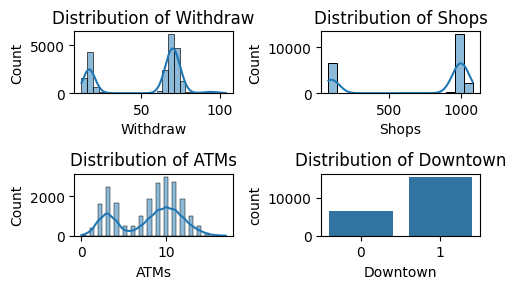

,Shops,ATMs,Downtown,Weekday,Center,High,Withdraw
count,22000.000000,22000.000000,22000.00000,22000.000000,22000.000000,22000.000000,22000.000000
mean,731.637318,7.937455,0.70200,0.714091,0.102455,0.301591,54.652818
std,411.869245,3.673415,0.45739,0.451857,0.303252,0.458959,25.099767
min,80.000000,0.000000,0.00000,0.000000,0.000000,0.000000,11.668197
25%,105.000000,4.000000,0.00000,0.000000,0.000000,0.000000,18.500386
50%,989.000000,9.000000,1.00000,1.000000,0.000000,0.000000,68.240749
75%,1007.000000,11.000000,1.00000,1.000000,0.000000,1.000000,71.345778
max,1083.000000,17.000000,1.00000,1.000000,1.000000,1.000000,103.964065


In [3]:
# 1. Summary Statistics
summary_stats = atm.describe()

# 2. Distribution Analysis
# plt.figure(figsize=(16, 10))    

# Histogram for Withdraw
plt.subplot(2, 2, 1)
sns.histplot(atm['Withdraw'], kde=True)
plt.title('Distribution of Withdraw')

# Histogram for Shops
plt.subplot(2, 2, 2)
sns.histplot(atm['Shops'], kde=True)
plt.title('Distribution of Shops')

# Histogram for ATMs
plt.subplot(2, 2, 3)
sns.histplot(atm['ATMs'], kde=True)
plt.title('Distribution of ATMs')

# Histogram for Downtown (binary)
plt.subplot(2, 2, 4)
sns.countplot(x=atm['Downtown'])
plt.title('Distribution of Downtown')

plt.tight_layout()
plt.show()

summary_stats

In [4]:
atm.corr()

,Shops,ATMs,Downtown,Weekday,Center,High,Withdraw
Shops,1.000000,0.872903,0.999131,0.013014,0.000004,0.001820,0.985797
ATMs,0.872903,1.000000,0.873726,0.009766,-0.003306,-0.002616,0.824030
Downtown,0.999131,0.873726,1.000000,0.012664,-0.000101,0.001782,0.983574
Weekday,0.013014,0.009766,0.012664,1.000000,-0.007153,-0.006793,-0.050470
Center,0.000004,-0.003306,-0.000101,-0.007153,1.000000,0.010521,0.088103
High,0.001820,-0.002616,0.001782,-0.006793,0.010521,1.000000,0.021275
Withdraw,0.985797,0.824030,0.983574,-0.050470,0.088103,0.021275,1.000000


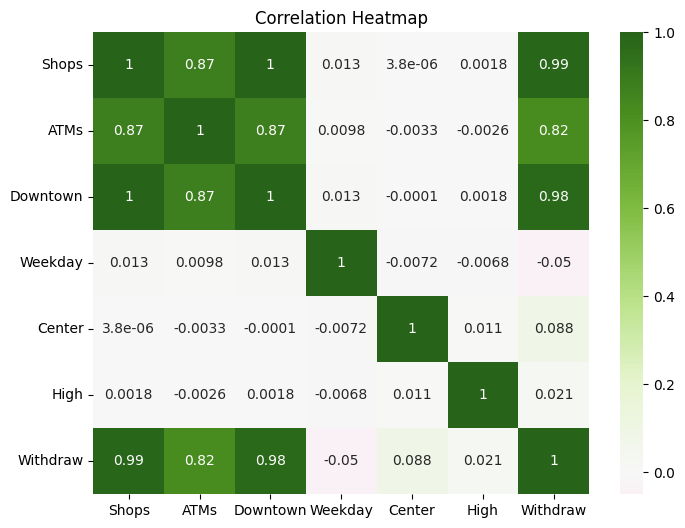

In [5]:
plt.figure(figsize=(8, 6))
sns.heatmap(atm.corr(),  cmap='PiYG', center=0, annot=True)
plt.title('Correlation Heatmap')
plt.show()


In [6]:
testingDowntown = atm.sort_values(by='Shops').reset_index()
testingDowntown['Match'] = testingDowntown['Downtown'].eq(testingDowntown['Downtown'].shift())
testingDowntown[~testingDowntown['Match']]
testingDowntown.iloc[6553:6558]

,index,Shops,ATMs,Downtown,Weekday,Center,High,Withdraw,Match
6553,21045,117,3,0,1,0,0,15.956201,True
6554,21300,117,4,0,0,1,0,21.573735,True
6555,18440,118,4,0,0,0,0,17.401981,True
6556,15387,922,8,1,0,0,0,64.255119,False
6557,7998,926,10,1,1,0,1,62.117446,True


In [7]:
downtown_counts = atm['Downtown'].value_counts().sort_index()
downtown_counts

Downtown
0     6556
1    15444
Name: count, dtype: int64

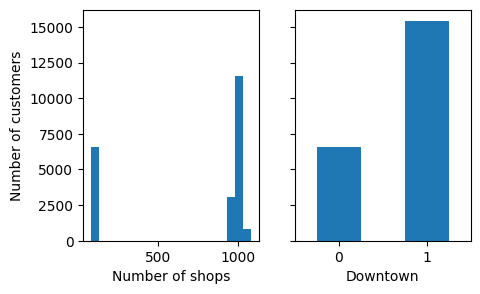

In [8]:
colinear_hists1, (ax1, ax2) = plt.subplots(1,2, sharey=True)
n1, bins1, patches1 = ax1.hist('Shops', bins=20, data=atm)
ax1.set_xlabel('Number of shops')
ax1.set_ylabel('Number of customers')
downtown_counts.plot(kind='bar')
ax2.set_xlabel('Downtown')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0)
plt.show()

In [9]:
testingDowntown['New_flag'] = np.where(testingDowntown['Shops'] < 500, 0, 1)
print(len(testingDowntown[testingDowntown['New_flag'] != testingDowntown['Downtown']]))

0


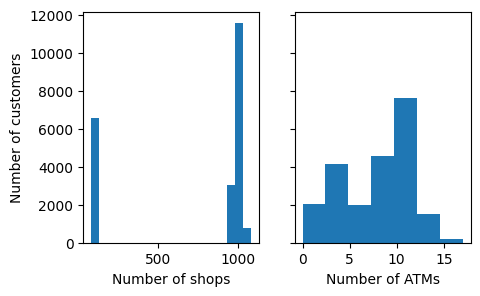

In [10]:
'''
So, we can get all the information contained in downtown from shops
Let's exclude downtown.
Now, ATMs and Shops are also highly correlated so let's look into atms
'''

colinear_hists2, (ax1, ax2) = plt.subplots(1,2, sharey=True)
n1, bins1, patches1 = ax1.hist('Shops', bins=20, data=atm)
ax1.set_xlabel('Number of shops')
ax1.set_ylabel('Number of customers')
n2, bins2, patches2 = ax2.hist('ATMs', bins=7, data=atm)
ax2.set_xlabel('Number of ATMs')
plt.show()

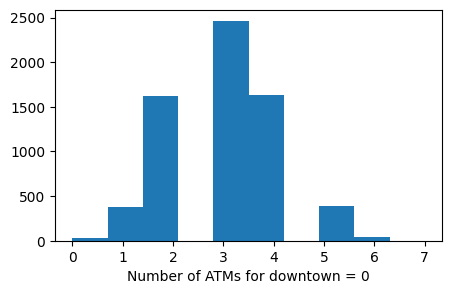

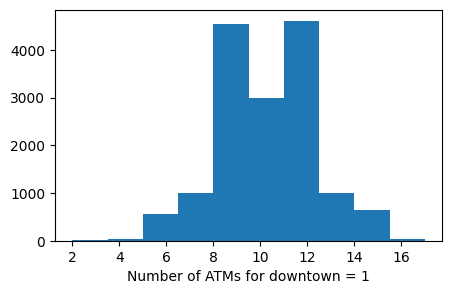

In [11]:
atms_by_downtown = atm.groupby('Downtown')

for key, group in atms_by_downtown:
    fig, ax = plt.subplots()
    n, bins, patches = ax.hist('ATMs', data=group)
    ax.set_xlabel(f'Number of ATMs for downtown = {key}')

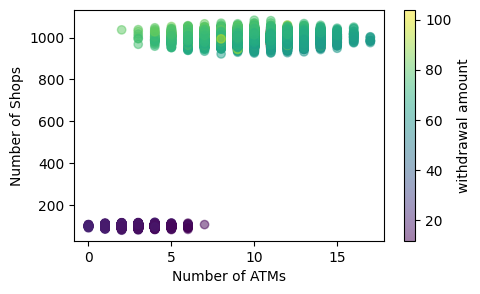

In [12]:
fig, ax = plt.subplots()
scatter_plt = ax.scatter(x='ATMs', y='Shops', data=atm, c='Withdraw', alpha=0.5)
ax.set_xlabel('Number of ATMs')
ax.set_ylabel('Number of Shops')
fig.colorbar(scatter_plt, label="withdrawal amount")
plt.show()

For downtown = 0


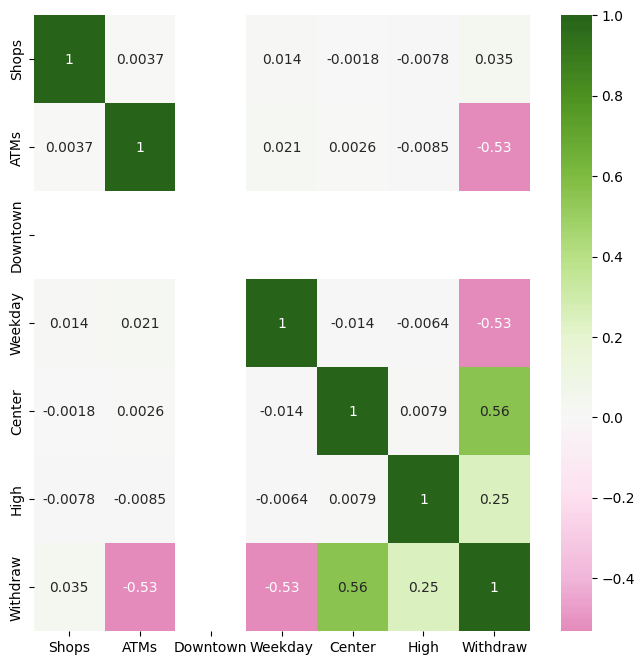

For downtown = 1


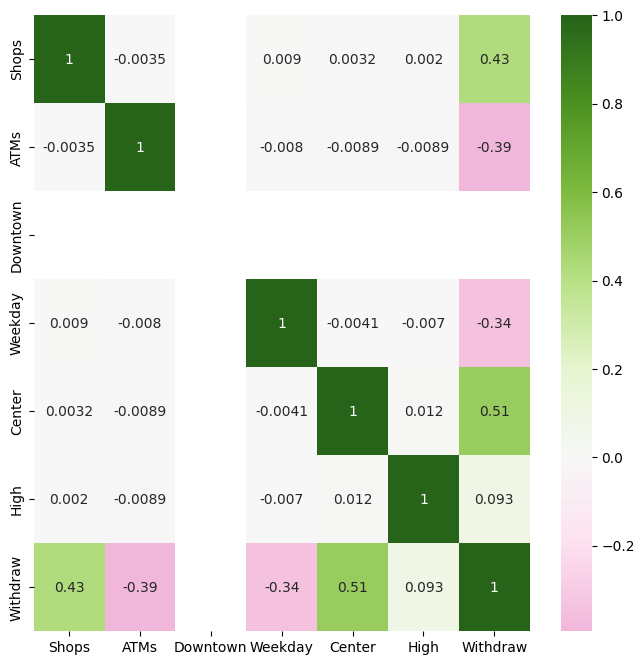

In [13]:
'''
So, it's pretty obvious that there are two groups, and we've seen that the flag downtown is just a manipulation of the number of shops
Let's see if anything effects different groups of downtown and maybe we could have a two-model approach
'''

for key, group in atms_by_downtown:
    print(f'For downtown = {key}')
    plt.figure(figsize=(8, 8)) 
    sns.heatmap(group.corr(),  cmap='PiYG', center=0, annot=True)
    plt.show()
    # fig, ax = plt.subplots()
    # scatter_plt = ax.scatter(x='ATMs', y='Shops', data=group, c='Withdraw', alpha=0.5)
    # ax.set_xlabel(f'Number of ATMs for downtown = {key}')
    # ax.set_ylabel(f'Number of Shops for downtown = {key}')
    # fig.colorbar(scatter_plt, label="withdrawal amount")

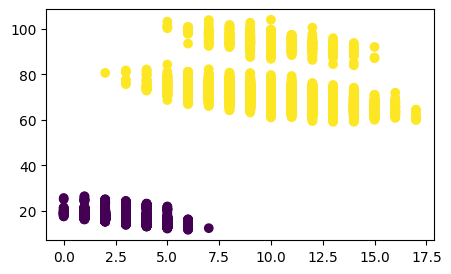

In [14]:
'''
So, we can see that we've gotten rid of our multicolinearity. Heuristic approach here followed by whatever method could be good.
'''
plt.scatter(x='ATMs',y='Withdraw',c='Downtown', data=atm)

   Shops  ATMs  Downtown  Weekday  Center  High   Withdraw  Downtown-Center  \
0   1018    10         1        0       0     0  72.750556             -2.0   
1    974    10         1        1       0     0  66.720482             -2.0   
2     96     2         0        0       0     1  19.189516              0.0   
3    958     9         1        1       0     1  67.388669             -2.0   
4    103     4         0        1       0     1  15.813127              0.0   

   Downtown-Weekday  Downtown-High  
0              -2.0           -2.0  
1              -1.0           -2.0  
2               0.0            1.0  
3              -1.0           -1.0  
4               1.0            1.0  


Text(0.5, 1.0, 'Coloured by Downtown-High')

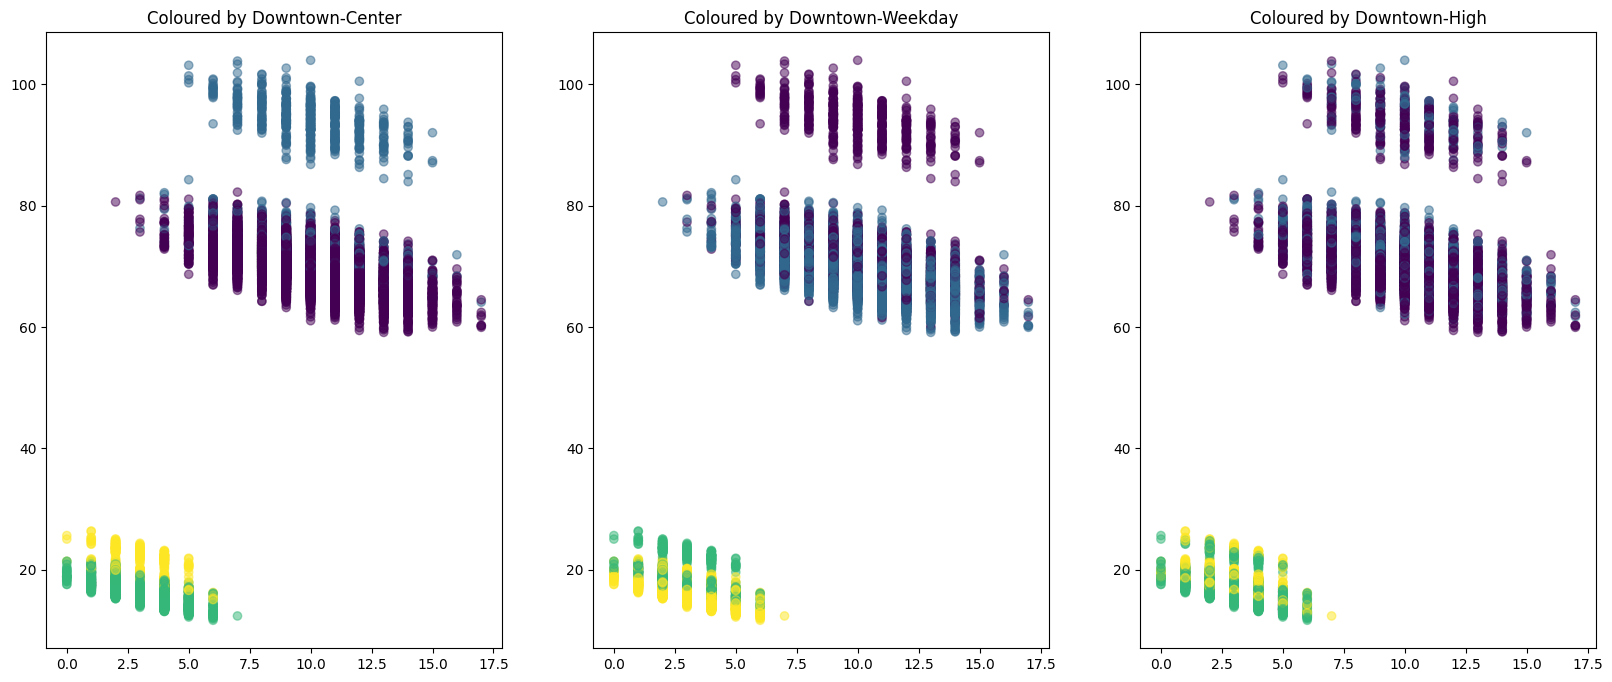

In [15]:
atm['Downtown-Center'] = atm.apply(lambda x: -2 * x.Downtown + x.Center, axis = 1)
atm['Downtown-Weekday'] = atm.apply(lambda x: -2 * x.Downtown + x.Weekday, axis = 1)
atm['Downtown-High'] = atm.apply(lambda x: -2 * x.Downtown + x.High, axis = 1)
print(atm.head())

plt.figure(figsize=(20, 8)) 
ax1, ax2, ax3 = plt.subplot(1,3,1), plt.subplot(1,3,2), plt.subplot(1,3,3)
ax1.scatter(x='ATMs',y='Withdraw',c='Downtown-Center', data=atm, alpha=0.5)
ax1.set_title('Coloured by Downtown-Center')
ax2.scatter(x='ATMs',y='Withdraw',c='Downtown-Weekday', data=atm, alpha=0.5)
ax2.set_title('Coloured by Downtown-Weekday')
ax3.scatter(x='ATMs',y='Withdraw',c='Downtown-High', data=atm, alpha=0.5)
ax3.set_title('Coloured by Downtown-High')

Inspecting relationships when splitting on downtown.

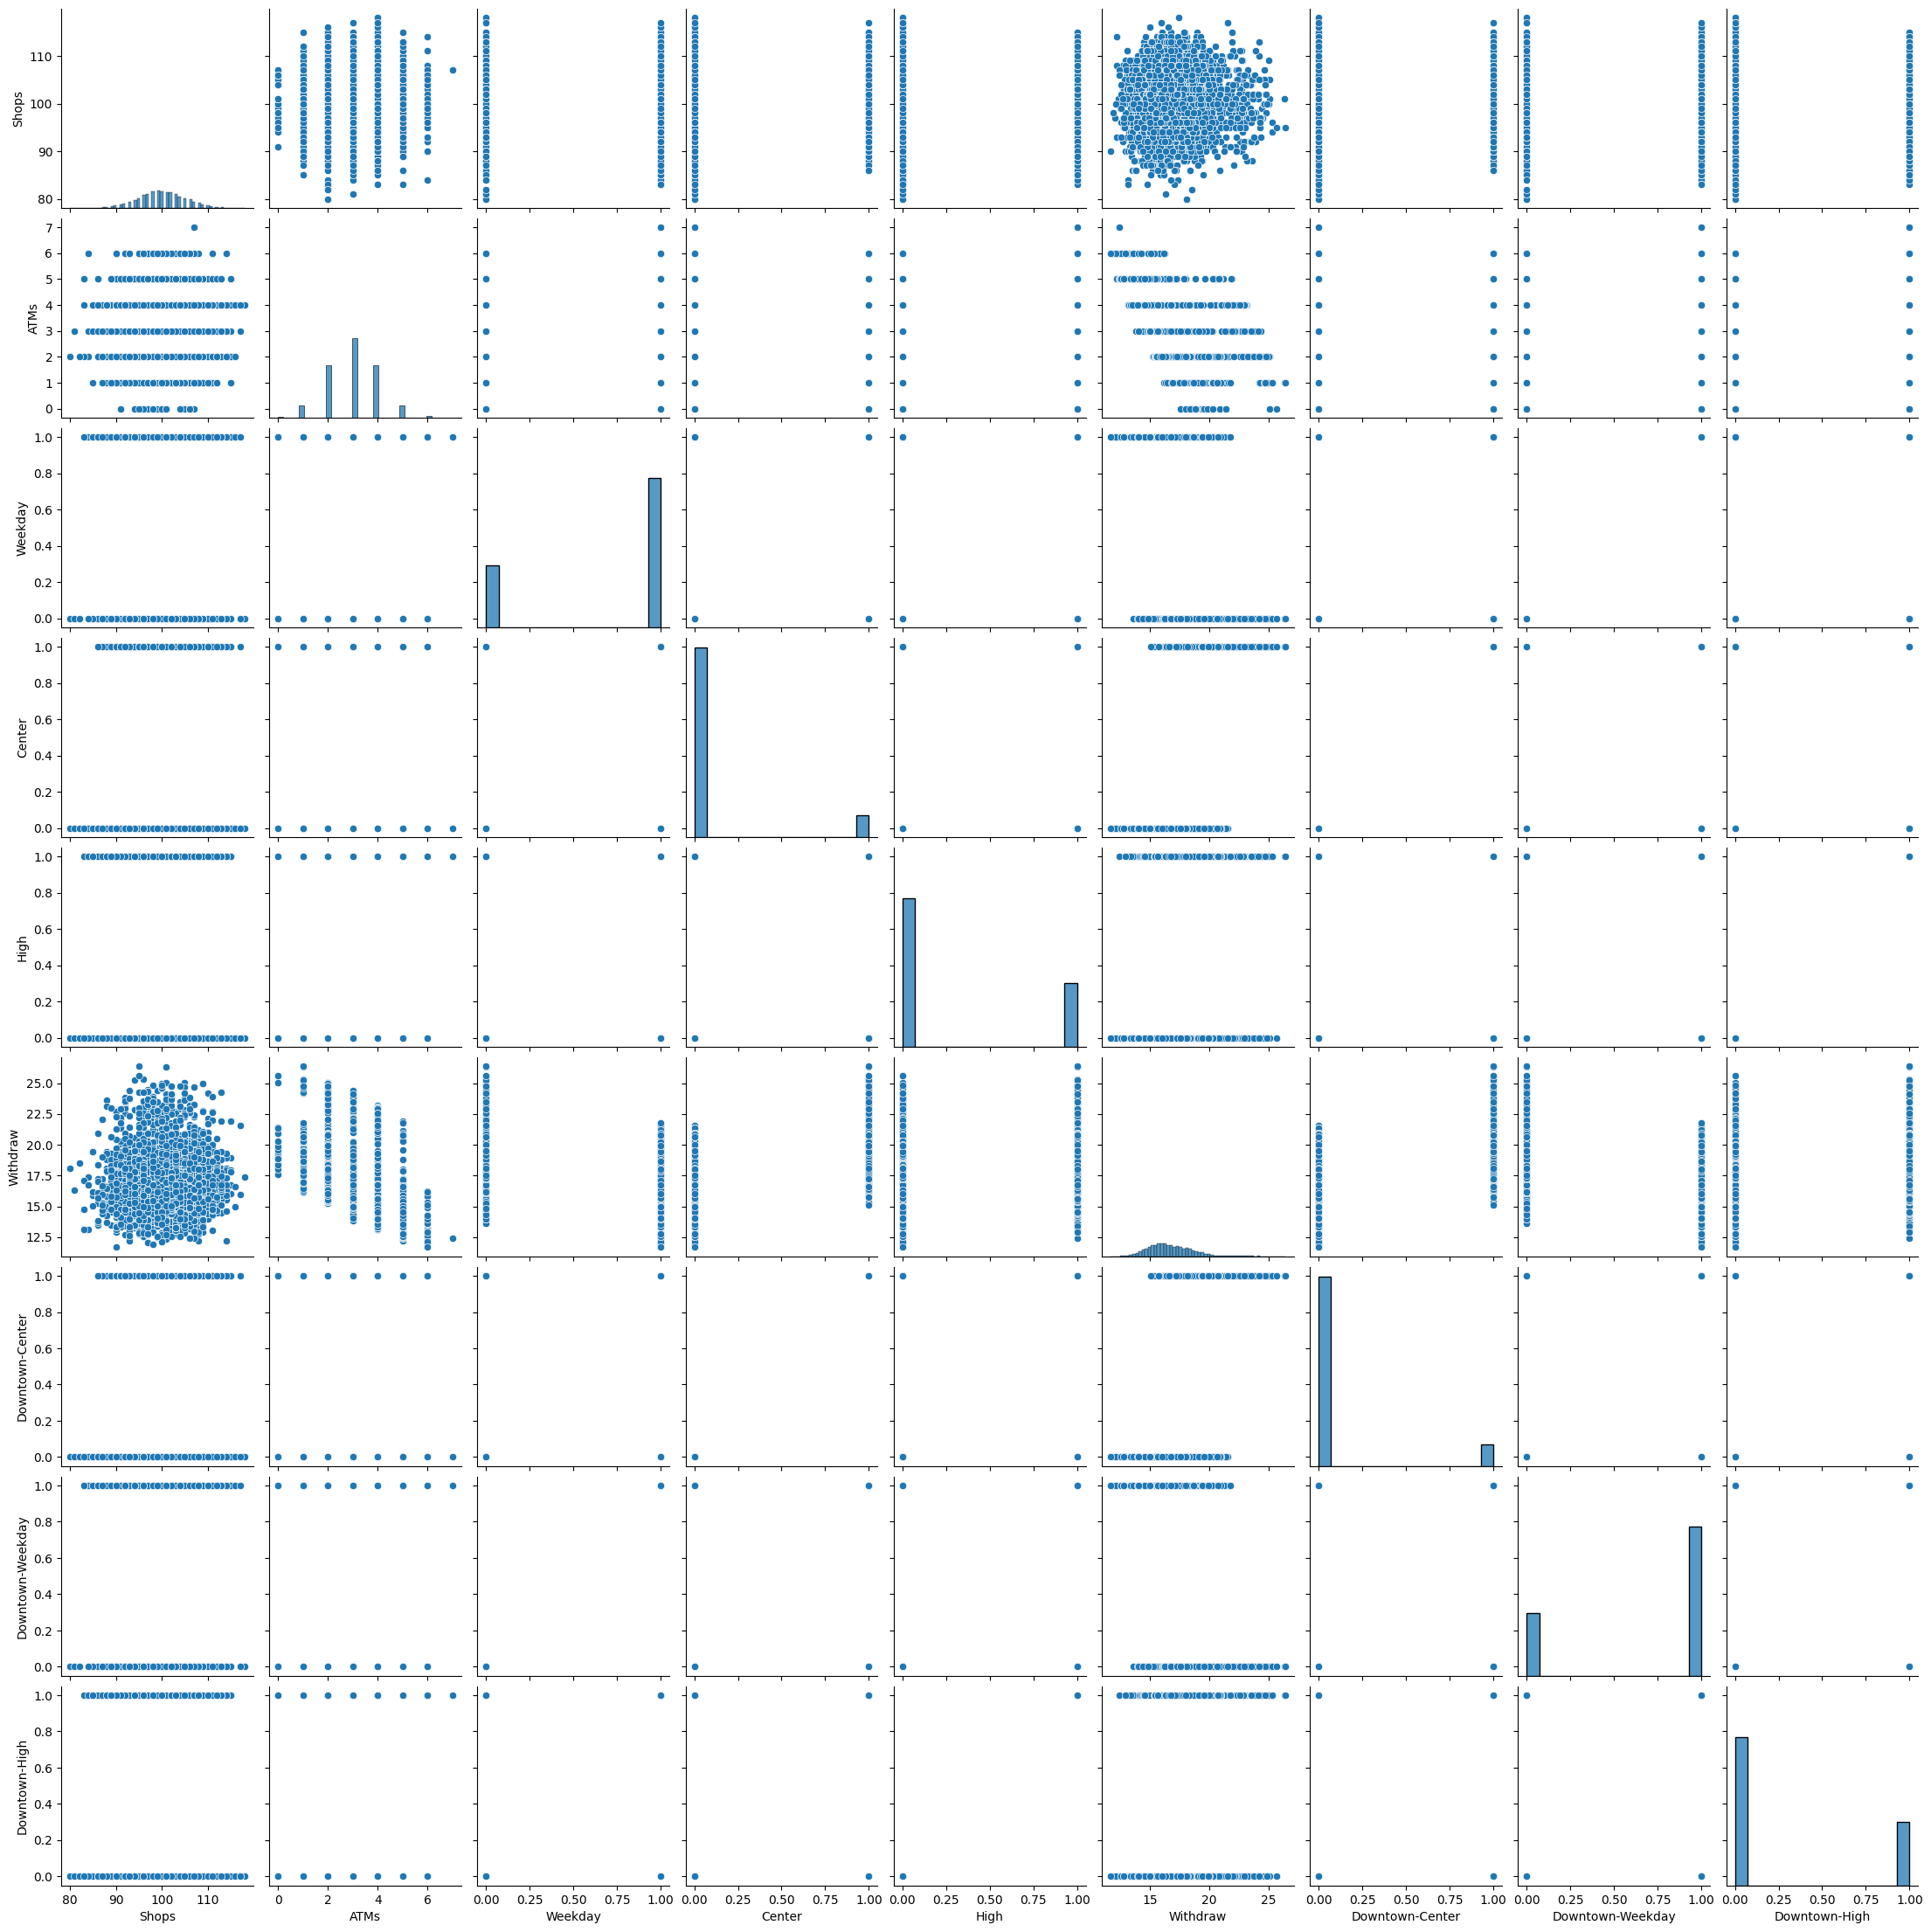

In [16]:
data_downtown_0 = atm[atm['Downtown'] == 0].drop('Downtown', axis=1)
data_downtown_1 = atm[atm['Downtown'] == 1].drop('Downtown', axis=1)

sns.pairplot(data_downtown_0)
plt.show()

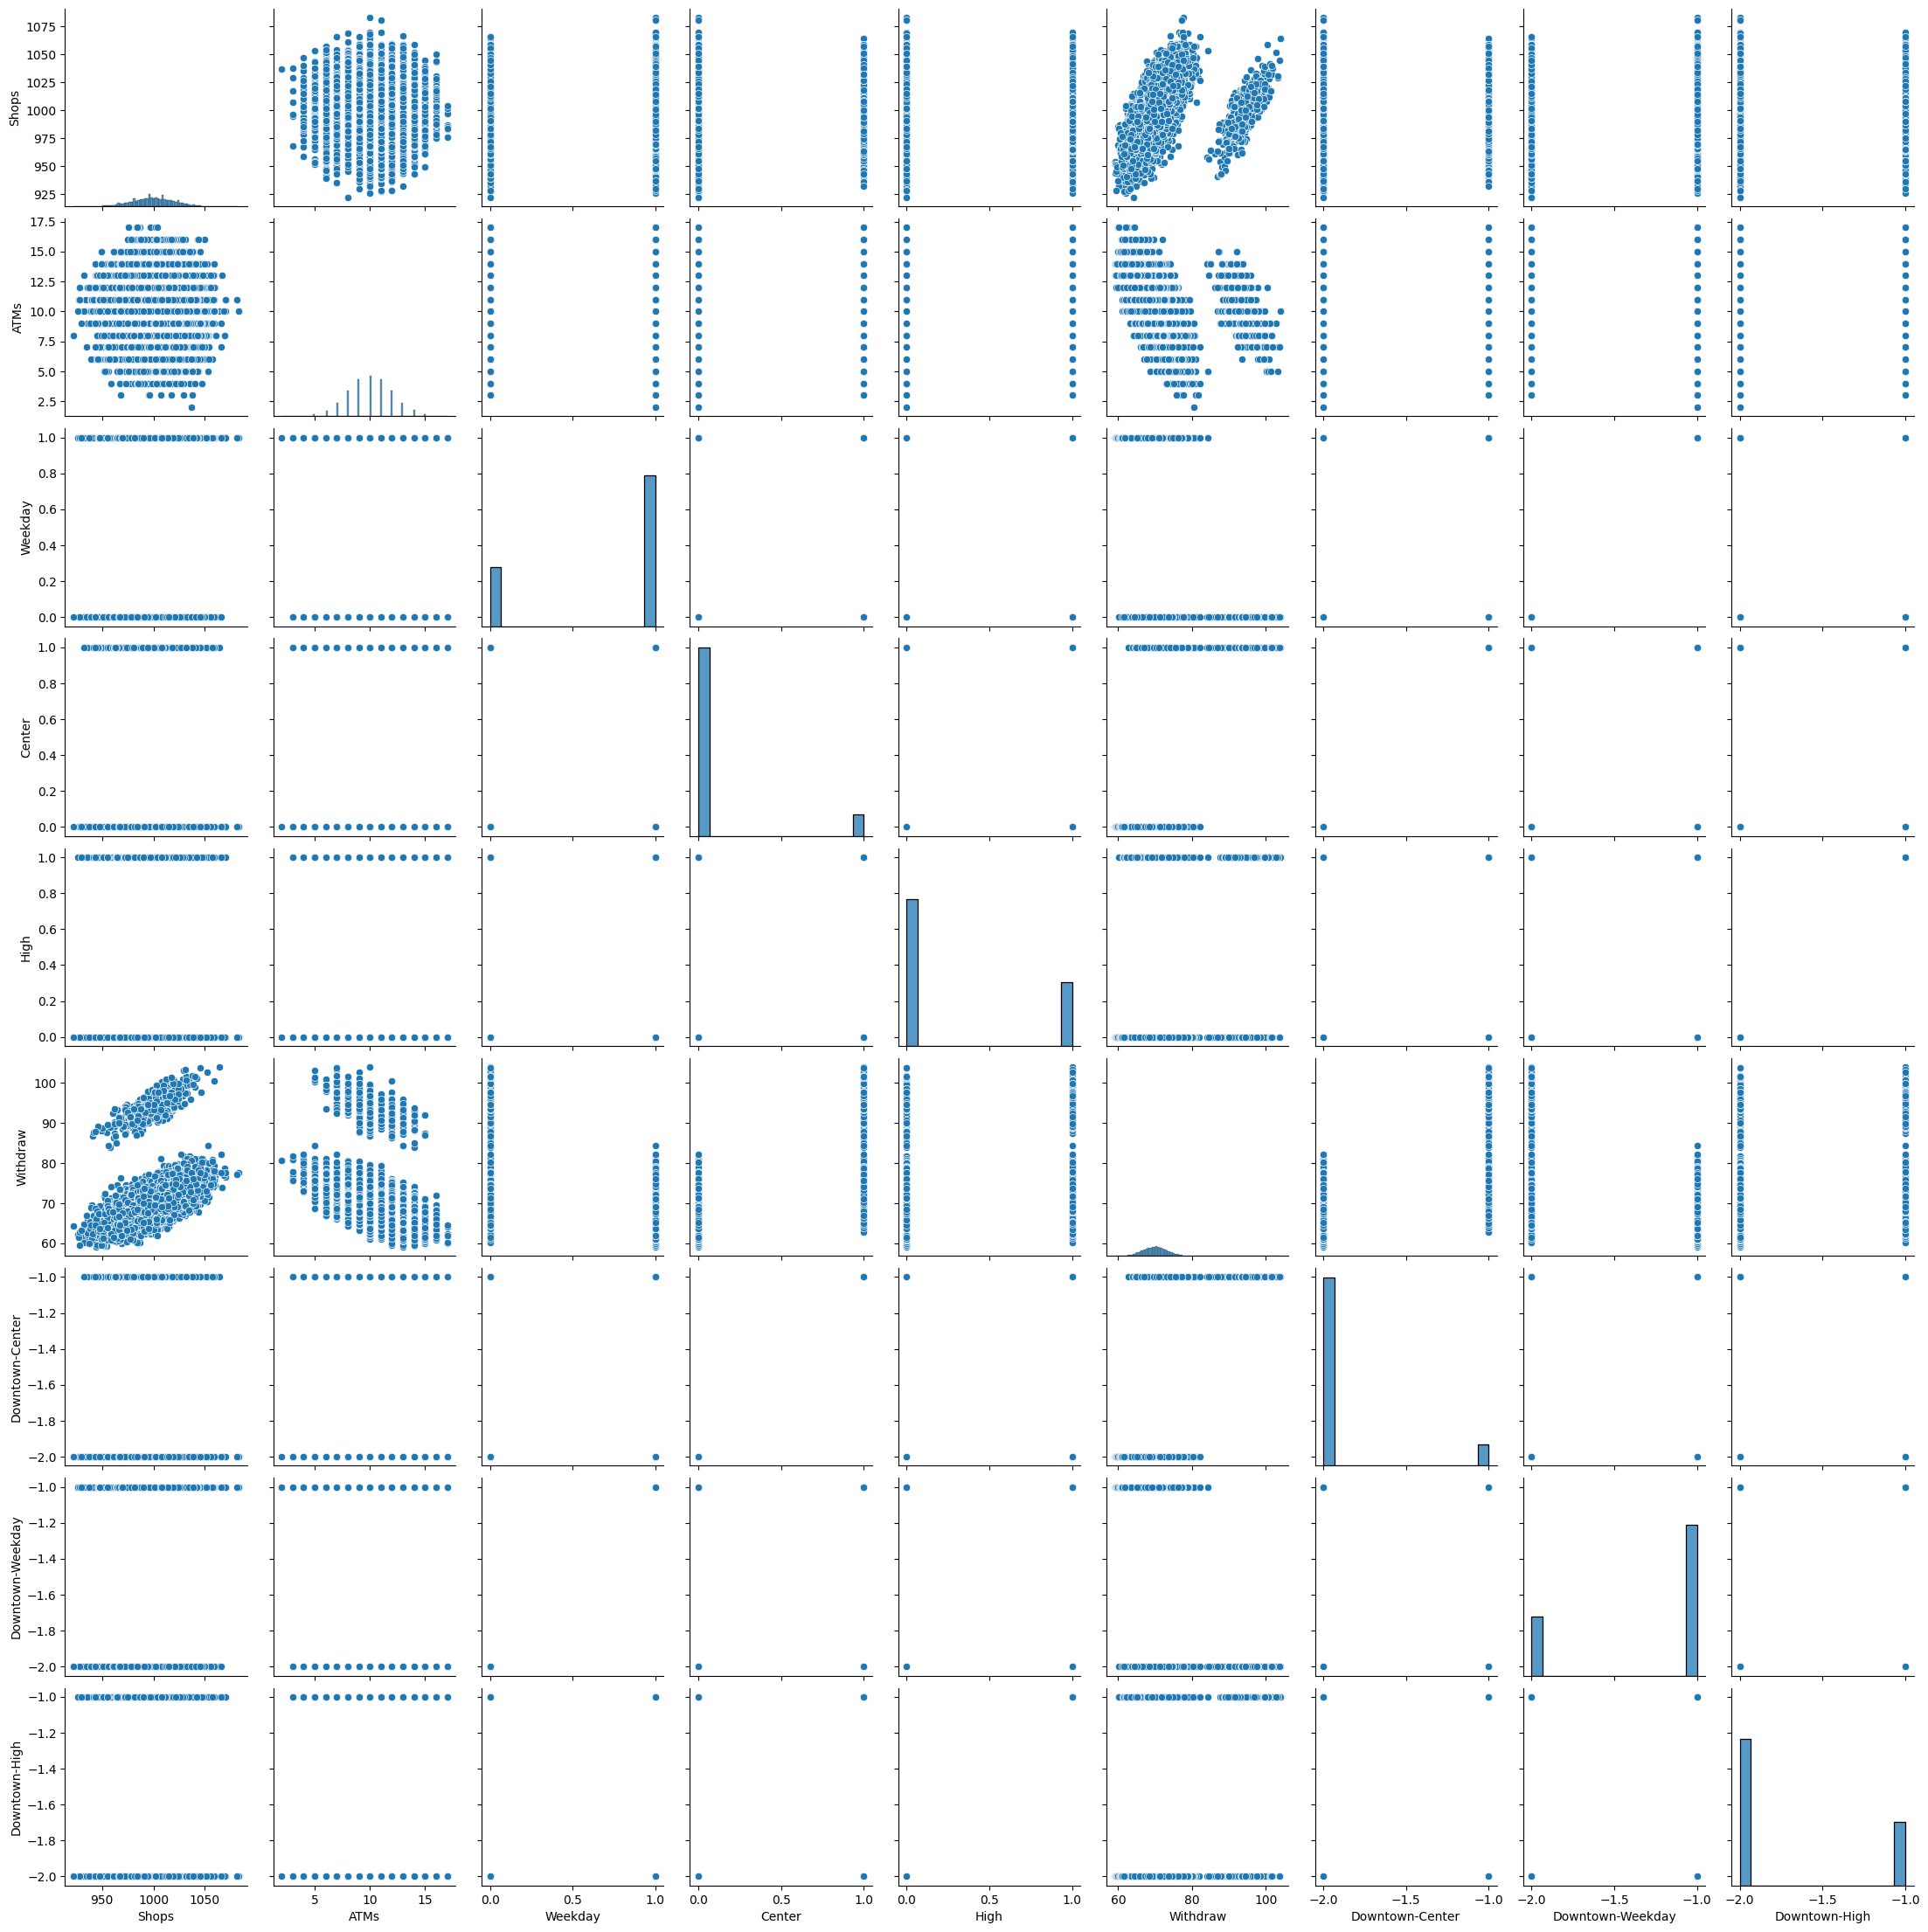

In [17]:
sns.pairplot(data_downtown_1)

In [18]:
atm

,Shops,ATMs,Downtown,Weekday,Center,High,Withdraw,Downtown-Center,Downtown-Weekday,Downtown-High
0,1018,10,1,0,0,0,72.750556,-2.0,-2.0,-2.0
1,974,10,1,1,0,0,66.720482,-2.0,-1.0,-2.0
2,96,2,0,0,0,1,19.189516,0.0,0.0,1.0
3,958,9,1,1,0,1,67.388669,-2.0,-1.0,-1.0
4,103,4,0,1,0,1,15.813127,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...
21995,1015,12,1,0,0,0,71.384290,-2.0,-2.0,-2.0
21996,101,2,0,1,0,0,16.031066,0.0,1.0,0.0
21997,96,3,0,1,0,0,14.968847,0.0,1.0,0.0
21998,991,6,1,0,0,0,73.705665,-2.0,-2.0,-2.0


In [19]:
def pairwise_boxplots(df, predictor_var, predicted_var='Withdraw'):
    """
    Plots pairwise boxplots of the predicted variable against the predictor variable, 
    colored by a binary variable.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    predictor_var (str): The name of the predictor variable.
    predicted_var (str): The name of the predicted variable (default is 'withdraw').
    """
    # Set style for better visual appearance
    sns.set_theme(style="white")

    # Create the boxplot
    plt.figure(figsize=(12, 8))
    sns.boxplot(data=df, x=predictor_var, y=predicted_var, palette='Set1')

    # Add plot title and labels
    plt.title(f"Withdraws based on {predictor_var}")
    plt.xlabel(predictor_var)
    plt.ylabel(predicted_var)

    plt.show()

/var/folders/r4/y9yr2khx1q9d4_bz1bv0zk2w0000gn/T/ipykernel_60451/1927458050.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=predictor_var, y=predicted_var, palette='Set1')


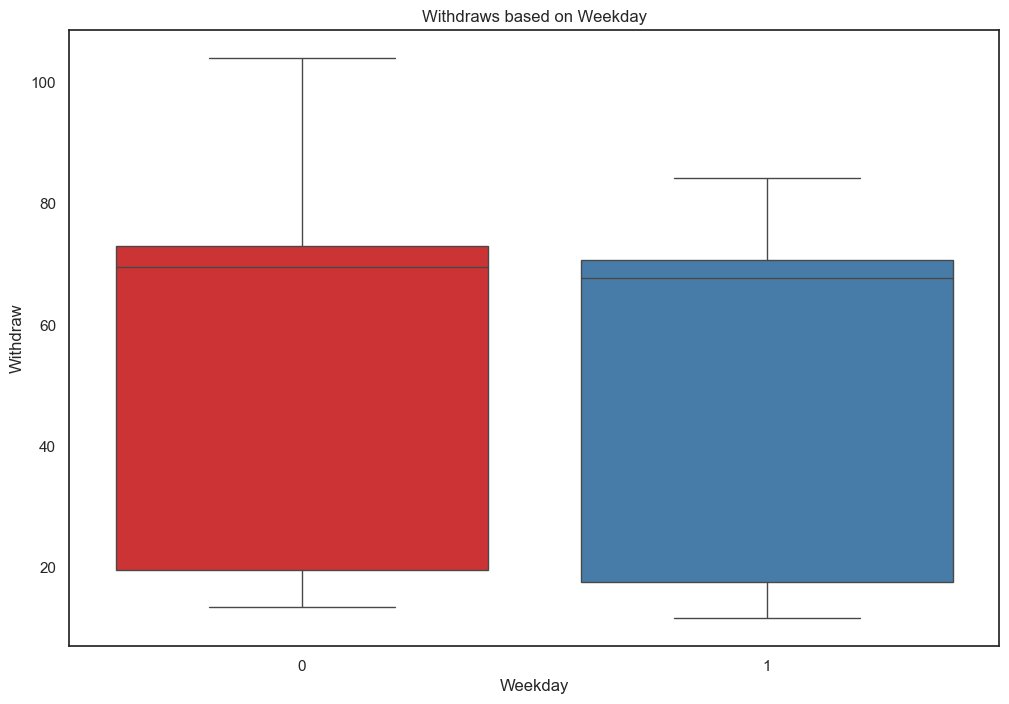

In [20]:
pairwise_boxplots(atm, predictor_var='Weekday')

/var/folders/r4/y9yr2khx1q9d4_bz1bv0zk2w0000gn/T/ipykernel_60451/1927458050.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=predictor_var, y=predicted_var, palette='Set1')


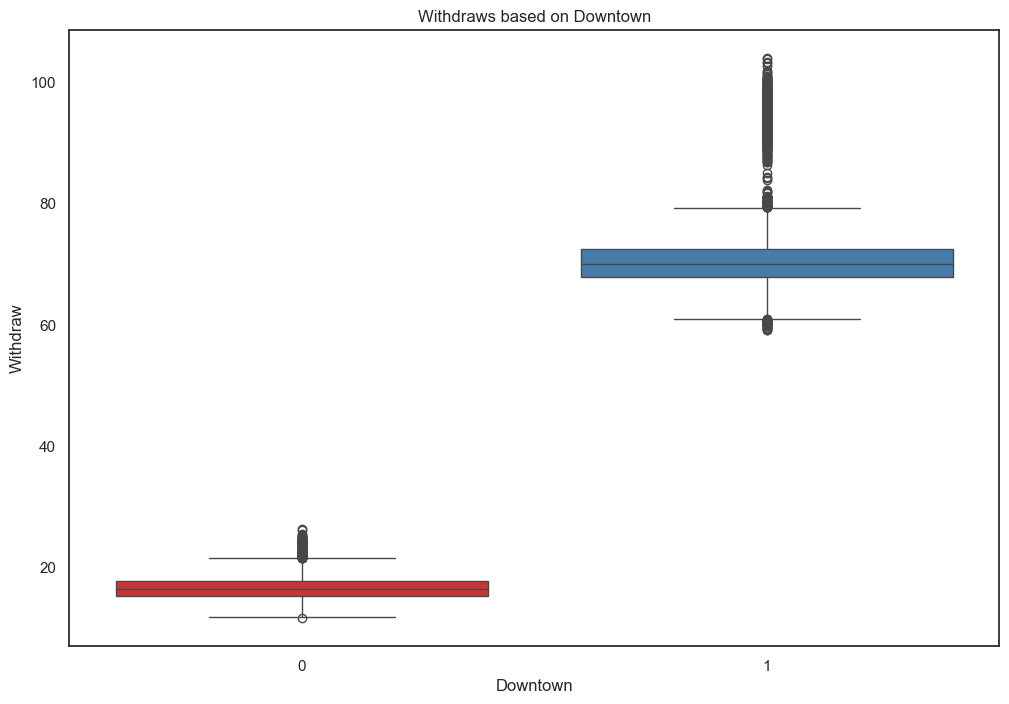

In [21]:
pairwise_boxplots(atm, predictor_var='Downtown')

/var/folders/r4/y9yr2khx1q9d4_bz1bv0zk2w0000gn/T/ipykernel_60451/1927458050.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=predictor_var, y=predicted_var, palette='Set1')


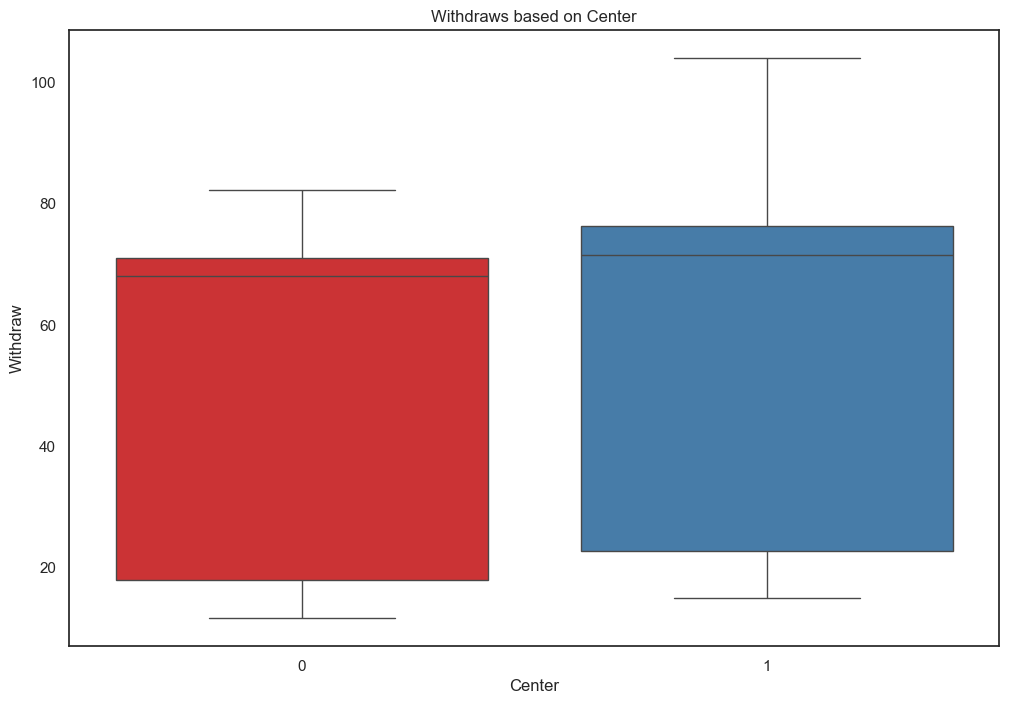

In [22]:
pairwise_boxplots(atm, predictor_var='Center')

/var/folders/r4/y9yr2khx1q9d4_bz1bv0zk2w0000gn/T/ipykernel_60451/1927458050.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=predictor_var, y=predicted_var, palette='Set1')


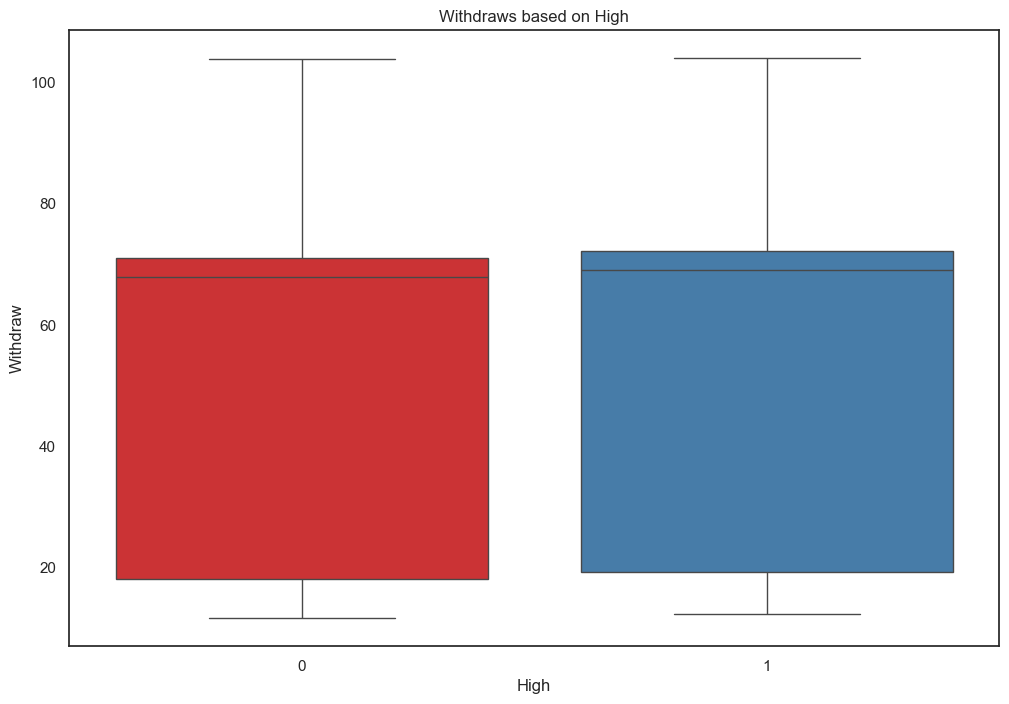

In [23]:
pairwise_boxplots(atm, predictor_var='High')

In [24]:
import statsmodels.api as sm

"""
Running two separate regression models—one with only Shops and another with only
Downtown as predictors—to see which one explains more of the variance in Withdraw.
"""

y = atm['Withdraw']

# Simple regression model with only Shops
X_shops = sm.add_constant(atm['Shops'])
model_shops = sm.OLS(y, X_shops).fit()

# Simple regression model with only Downtown
X_downtown = sm.add_constant(atm['Downtown'])
model_downtown = sm.OLS(y, X_downtown).fit()

# Retrieve R-squared values from each model to compare their explanatory power
r_squared_shops = model_shops.rsquared
r_squared_downtown = model_downtown.rsquared


"""
The R-squared values for the simple models:

Shops only: R^2 = 0.972
Downtown only: R^2 = 0.967

This indicates that Shops alone explains slightly more of the variance in 
Withdraw compared to Downtown alone.

Shops alone explains 97.2% of the variability in Withdraw 
"""
r_squared_shops, r_squared_downtown

(np.float64(0.9717963781182354), np.float64(0.967417937620132))

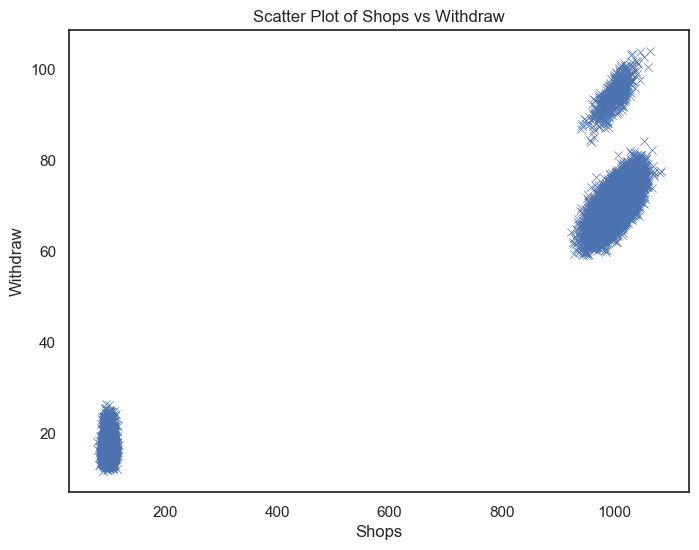

In [25]:
# Scatter Plot for Shops vs Withdraw
plt.figure(figsize=(8, 6))
sns.scatterplot(x=atm['Shops'], y=atm['Withdraw'], marker='x')
plt.title('Scatter Plot of Shops vs Withdraw')
plt.xlabel('Shops')
plt.ylabel('Withdraw')
plt.show()


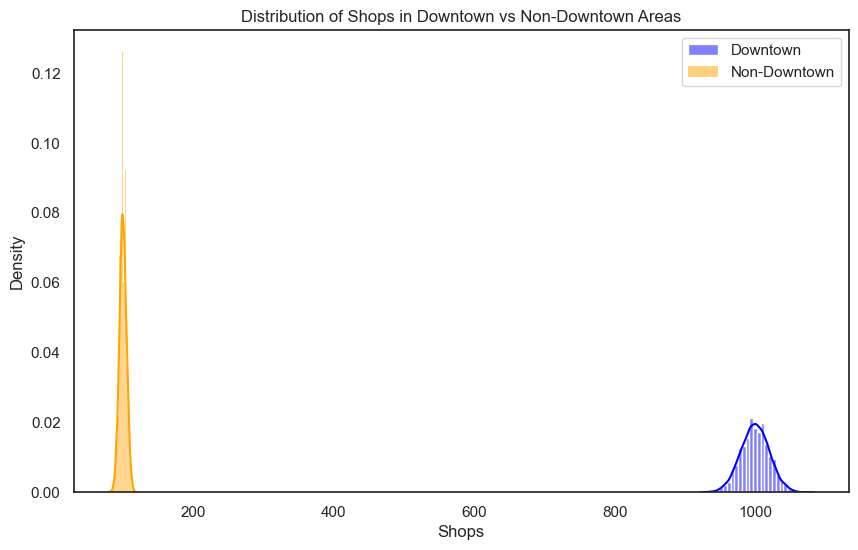

(Downtown
 0    100.051251
 1    999.746503
 Name: Shops, dtype: float64,
 np.float64(5163.660751158398),
 np.float64(0.0))

In [26]:
from scipy.stats import ttest_ind

# 1. Mean Shops Count by Downtown
mean_shops_by_downtown = atm.groupby('Downtown')['Shops'].mean()

# 2. Distribution Comparison: Shops distribution for downtown vs non-downtown
plt.figure(figsize=(10, 6))
sns.histplot(atm[atm['Downtown'] == 1]['Shops'], color='blue', label='Downtown', kde=True, stat="density", bins=30)
sns.histplot(atm[atm['Downtown'] == 0]['Shops'], color='orange', label='Non-Downtown', kde=True, stat="density", bins=30)
plt.title('Distribution of Shops in Downtown vs Non-Downtown Areas')
plt.xlabel('Shops')
plt.ylabel('Density')
plt.legend()
plt.show()

# 3. Statistical Test: T-test for Shops between Downtown and Non-Downtown
downtown_shops = atm[atm['Downtown'] == 1]['Shops']
non_downtown_shops = atm[atm['Downtown'] == 0]['Shops']
t_stat, p_value = ttest_ind(downtown_shops, non_downtown_shops, equal_var=False)

mean_shops_by_downtown, t_stat, p_value

**Mean Shops Count**:
- Non-Downtown areas: Average of 100 shops.
- Downtown areas: Average of about 1000 shops.
- The distribution shows that downtown areas generally have far more shops, with a clear separation between downtown and non-downtown areas.

The t-test yields a very high t-statistic and a p-value of 0.0, indicating that the difference in shop counts between downtown and non-downtown areas is statistically significant.

This substantial difference aligns with the strong correlation observed earlier and suggests that Downtown might largely account for high shop counts, reinforcing the idea that Shops alone could serve as a primary indicator without needing Downtown as an additional predictor.

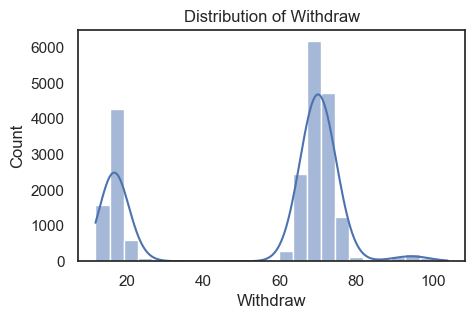

In [27]:
"""
Looking into top range of withdraw
"""
sns.histplot(atm['Withdraw'], kde=True)
plt.title('Distribution of Withdraw')
plt.show()

In [28]:
sorted_withdraw = atm.sort_values(by='Withdraw').reset_index(drop=True).copy()
sorted_withdraw['Withdraw_Diff'] = sorted_withdraw['Withdraw'].subtract(sorted_withdraw['Withdraw'].shift()).astype(float)
sorted_withdraw.sort_values(by='Withdraw_Diff', ascending=False)

,Shops,ATMs,Downtown,Weekday,Center,High,Withdraw,Downtown-Center,Downtown-Weekday,Downtown-High,Withdraw_Diff
6556,944,13,1,1,0,0,59.118507,-2.0,-1.0,-2.0,3.273508e+01
21544,958,14,1,0,1,0,83.959523,-1.0,-2.0,-2.0,1.720028e+00
21548,961,12,1,0,1,0,86.320682,-1.0,-2.0,-2.0,1.191470e+00
21995,1052,9,1,0,1,1,102.670285,-1.0,-2.0,-1.0,7.808403e-01
21547,964,14,1,0,1,0,85.129212,-1.0,-2.0,-2.0,6.666889e-01
...,...,...,...,...,...,...,...,...,...,...,...
4155,100,4,0,1,1,0,17.200665,1.0,1.0,0.0,2.200000e-07
17881,991,7,1,1,0,1,72.271343,-2.0,-1.0,-1.0,9.000000e-08
13391,984,7,1,1,0,0,69.643572,-2.0,-1.0,-2.0,6.000000e-08
4785,112,2,0,1,0,0,17.739296,0.0,1.0,0.0,0.000000e+00


In [29]:
sorted_withdraw.iloc[6554:6558]

,Shops,ATMs,Downtown,Weekday,Center,High,Withdraw,Downtown-Center,Downtown-Weekday,Downtown-High,Withdraw_Diff
6554,101,1,0,0,1,1,26.294659,1.0,0.0,1.0,0.658697
6555,95,1,0,0,1,1,26.383424,1.0,0.0,1.0,0.088765
6556,944,13,1,1,0,0,59.118507,-2.0,-1.0,-2.0,32.735083
6557,954,14,1,1,0,0,59.202799,-2.0,-1.0,-2.0,0.084293


In [30]:
sorted_withdraw.iloc[21542:21546]

,Shops,ATMs,Downtown,Weekday,Center,High,Withdraw,Downtown-Center,Downtown-Weekday,Downtown-High,Withdraw_Diff
21542,1027,4,1,1,1,1,82.138590,-1.0,-1.0,-1.0,0.294570
21543,1066,7,1,0,0,1,82.239495,-2.0,-2.0,-1.0,0.100905
21544,958,14,1,0,1,0,83.959523,-1.0,-2.0,-2.0,1.720028
21545,1053,5,1,1,1,1,84.279319,-1.0,-1.0,-1.0,0.319795


In [31]:
sorted_withdraw.iloc[21546:21550]

,Shops,ATMs,Downtown,Weekday,Center,High,Withdraw,Downtown-Center,Downtown-Weekday,Downtown-High,Withdraw_Diff
21546,956,13,1,0,1,0,84.462523,-1.0,-2.0,-2.0,0.183205
21547,964,14,1,0,1,0,85.129212,-1.0,-2.0,-2.0,0.666689
21548,961,12,1,0,1,0,86.320682,-1.0,-2.0,-2.0,1.191470
21549,941,10,1,0,1,0,86.801153,-1.0,-2.0,-2.0,0.480470


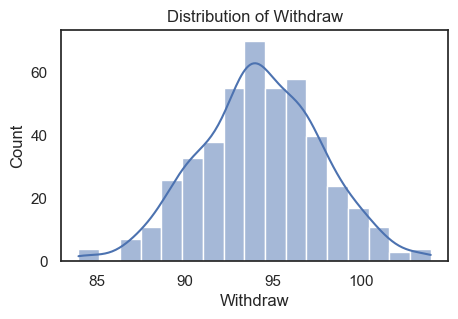

In [39]:
"""
So maybe we can use withdraw as 83 as our cutoff
"""
high_withdraw = atm[atm['Withdraw'] > 83].copy()
sns.histplot(high_withdraw['Withdraw'], kde=True)
plt.title('Distribution of Withdraw')
plt.show()

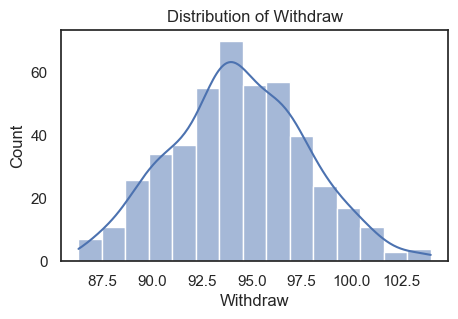

In [43]:
"""
Maybe actually 86 because I don't like that little bump on the end
"""
high_withdraw = atm[atm['Withdraw'] > 86].copy()
sns.histplot(high_withdraw['Withdraw'], kde=True)
plt.title('Distribution of Withdraw')
plt.show()

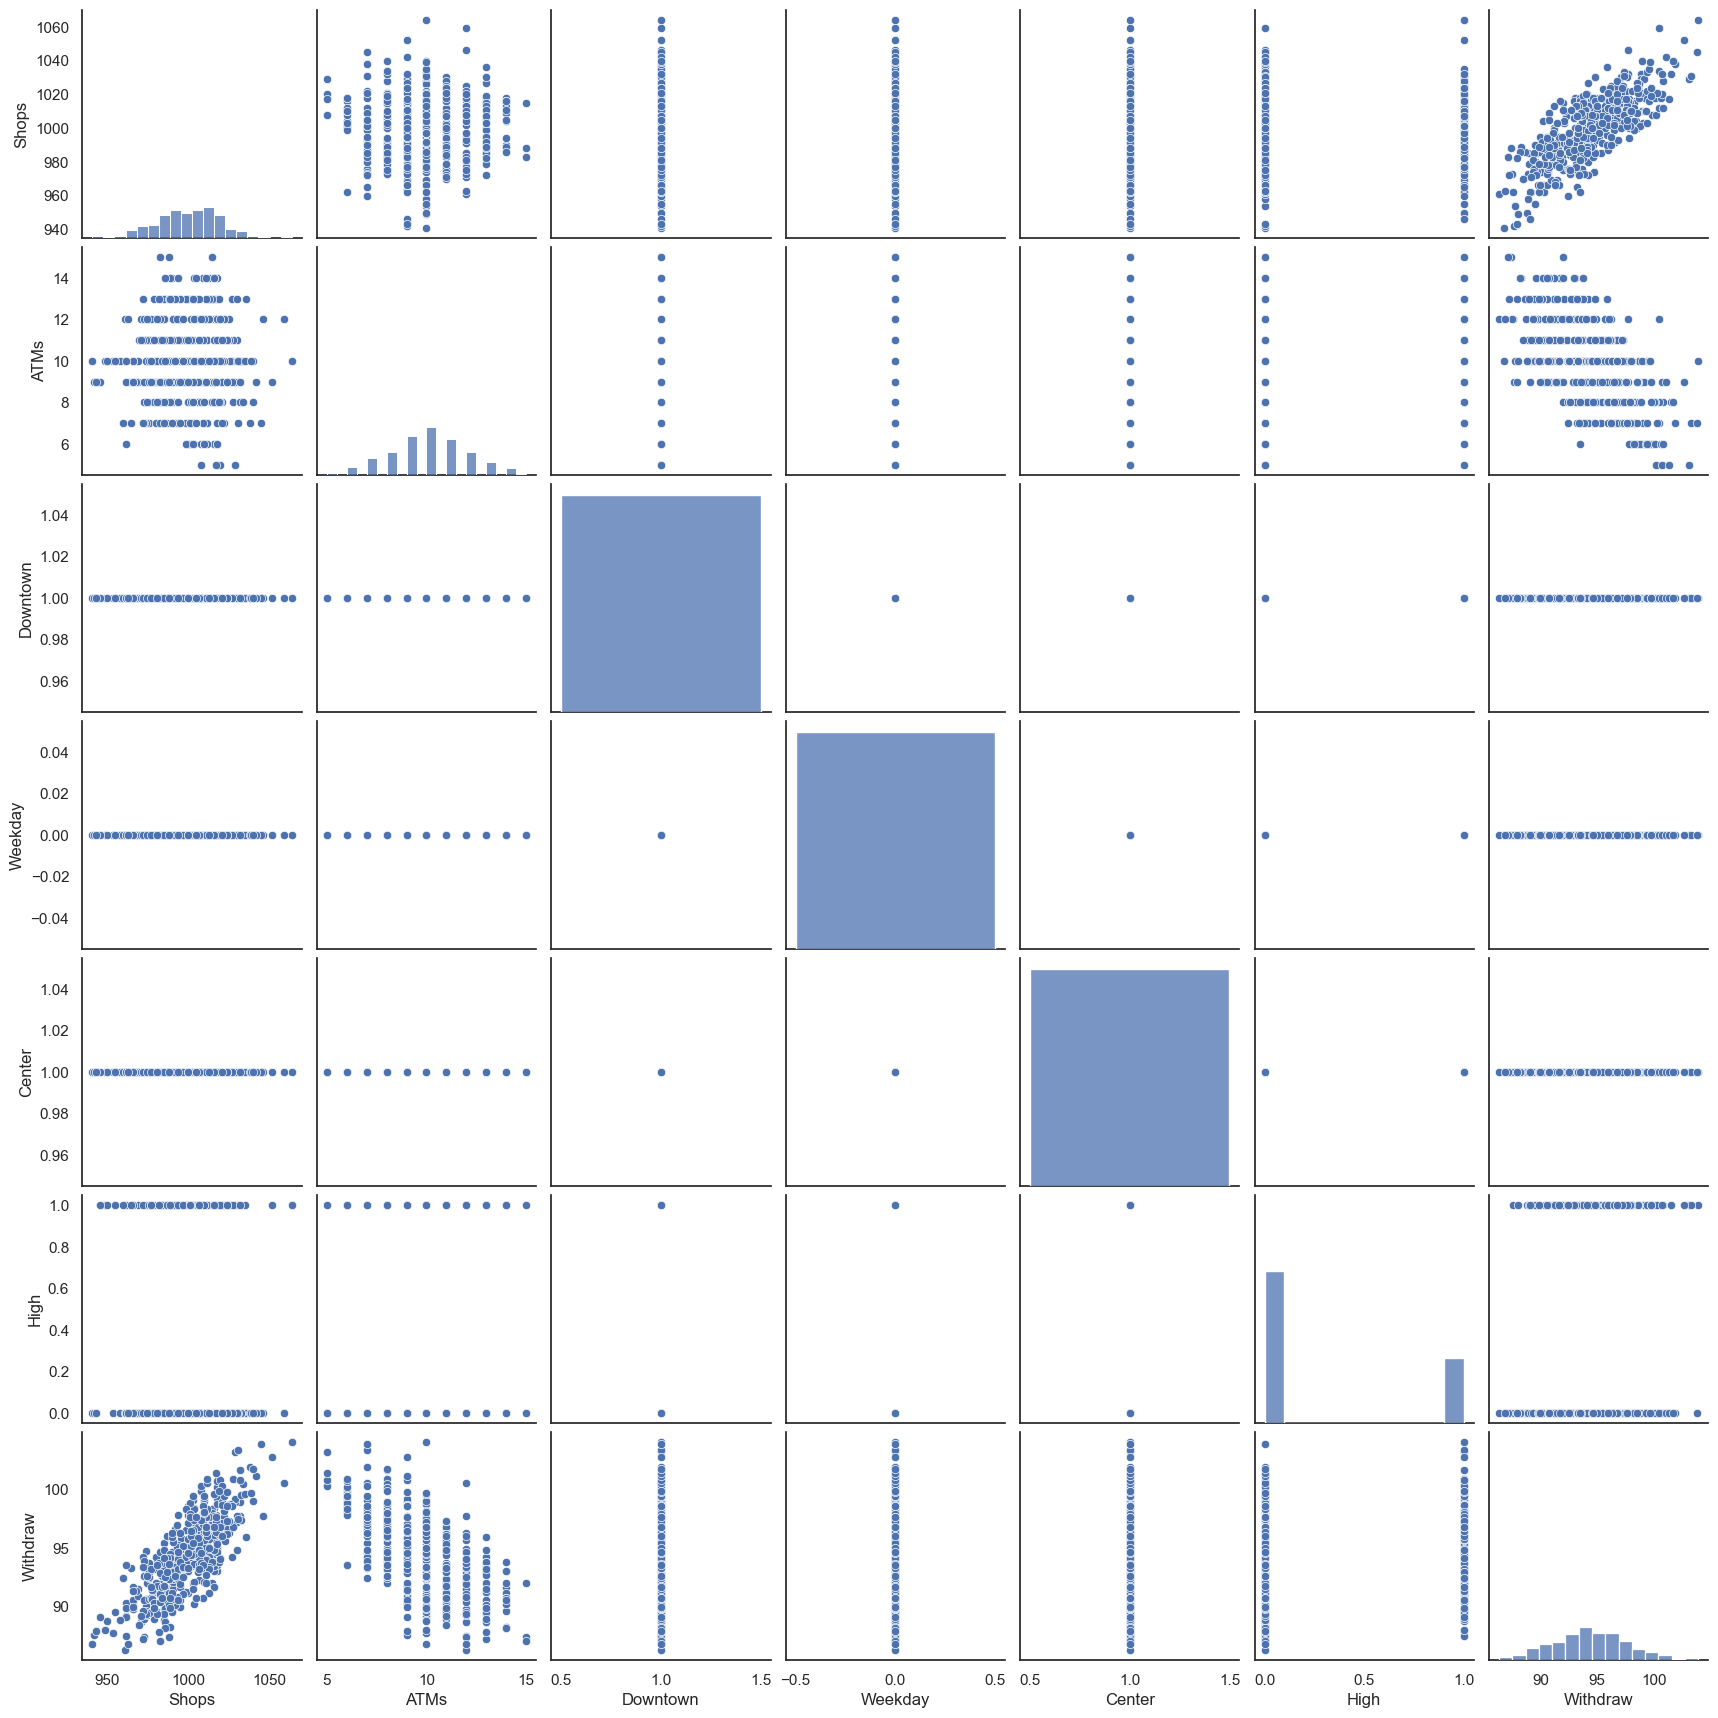

In [45]:
high_withdraw.drop(['Downtown-Center', 'Downtown-High', 'Downtown-Weekday'], inplace=True, axis=1)
sns.pairplot(data=high_withdraw)
plt.show()

452 455
3

    Now, the minimum value of withdraw we get above our cutoff mark of 86 is
    86.32068244.

    And we can see that our 3 datasets that don't fit this
    have the values of:
        Shops  ATMs  Downtown  Weekday  Center  High   Withdraw
8     956    13         1        0       1     0  84.462523
10    958    14         1        0       1     0  83.959523
21    964    14         1        0       1     0  85.129212

    and so it makes sense why they got cutoff.

    However, if we plot them we can see that
    


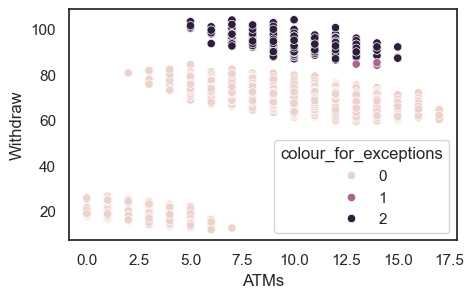


    They actually belong to our group! So, no problems here. We can use the boolean rule
    to define our group.
    


In [51]:
finding_high_withdraw = atm[(atm['Downtown'] == 1) & (atm['Weekday'] == 0) & (atm['Center'] == 1)]

print(len(high_withdraw), len(finding_high_withdraw))
fit_boolean_but_not_cutoff = pd.merge(high_withdraw, finding_high_withdraw, how="outer", indicator=True)
fit_boolean_but_not_cutoff = fit_boolean_but_not_cutoff[fit_boolean_but_not_cutoff['_merge'] == 'right_only']
fit_boolean_but_not_cutoff.drop(['Downtown-Center', 'Downtown-Weekday', 'Downtown-High', '_merge'], axis=1, inplace=True)
print(len(fit_boolean_but_not_cutoff))

print(f'''
    Now, the minimum value of withdraw we get above our cutoff mark of 86 is
    {high_withdraw.sort_values(by='Withdraw').head(3).min()['Withdraw']}.

    And we can see that our {len(fit_boolean_but_not_cutoff)} datasets that don't fit this
    have the values of:
    {fit_boolean_but_not_cutoff[['Shops', 'ATMs', 'Downtown', 'Weekday', 'Center', 'High', 'Withdraw']]}

    and so it makes sense why they got cutoff.

    However, if we plot them we can see that
    '''
)

atm['colour_for_exceptions'] = np.where((atm['Downtown'] == 1) & (atm['Weekday'] == 0) & (atm['Center'] == 1), 1, 0)
atm['colour_for_exceptions'] = np.where(atm['Withdraw'] > 86, 2, atm['colour_for_exceptions'])
sns.scatterplot(x='ATMs', y='Withdraw', data=atm, hue='colour_for_exceptions')
plt.show()

print('''
    They actually belong to our group! So, no problems here. We can use the boolean rule
    to define our group.
    '''
)